# Financial Analysis of Microsoft, Tesla, and Apple (2021–2023)

**Analyst**: Costas Pinto  
**Client**: Global Finance Corp (GFC)  
**Team**: BCG GenAI Consulting  

---

### Objective  
To extract and analyze key financial metrics from 10-K filings of Microsoft, Tesla, and Apple, focusing on:

- Revenue, Net Income, Assets, Liabilities, and Cash Flow  
- Year-over-Year (YoY) performance trends  
- Insights for GenAI-powered financial chatbot integration


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Styling
sns.set_context("talk", font_scale=1.2)
sns.set_style("darkgrid", {
    "axes.facecolor": "#111111",
    "grid.color": "#444444",
    "grid.linestyle": "--",
    "axes.edgecolor": "#888888",
    "text.color": "#dddddd",
    "axes.labelcolor": "#dddddd",
    "xtick.color": "#cccccc",
    "ytick.color": "#cccccc",
})

plt.rcParams.update({
    "figure.figsize": (12, 6),
    "figure.facecolor": "#0f0f0f",
    "axes.facecolor": "#111111",
    "axes.labelweight": "bold",
    "axes.labelsize": 14,
    "axes.titleweight": "bold",
    "axes.titlesize": 16,
    "axes.edgecolor": "#aaaaaa",
    "axes.linewidth": 1.2,
    "grid.alpha": 0.4,
    "grid.linewidth": 0.5,
    "legend.frameon": True,
    "legend.facecolor": "#1f1f1f",
    "legend.edgecolor": "#444444",
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2.2,
    "lines.markersize": 7,
    "font.family": "DejaVu Sans",
    "savefig.facecolor": "#0f0f0f",
    "savefig.edgecolor": "#0f0f0f"
})


## Step 1: Load Cleaned Financial Data
Load a CSV file containing:
- Company Name
- Year
- Financial metrics (Revenue, Net Income, etc.)

In [2]:
def load_data(filepath: str) -> pd.DataFrame:
    required_cols = [
        'Company', 'Year', 'Total Revenue', 'Net Income',
        'Total Assets', 'Total Liabilities', 'Cash Flow from Operating Activities'
    ]

    if not os.path.isfile(filepath):
        raise FileNotFoundError(f"[ERROR 404] File not found: {filepath}")

    df = pd.read_csv(filepath)

    missing = [col for col in required_cols if col not in df.columns]
    if missing:
        raise ValueError(f"[ERROR 422] Missing columns: {missing}")
    if df.empty:
        raise ValueError("[ERROR 204] Dataset is empty.")

    df['Year'] = df['Year'].astype(int)
    df.sort_values(by=["Company", "Year"], inplace=True)
    df.reset_index(drop=True, inplace=True)

    print(f"✅ Loaded dataset from: {filepath}")
    print(f"🔢 Shape: {df.shape}, Years: {df['Year'].nunique()}, Companies: {df['Company'].nunique()}")
    return df


### Financial Data (2021–2023)

| Company    | Year | Total Revenue (in M) | Net Income (in M) | Total Assets (in M) | Total Liabilities (in M) | Operating Cash Flow (in M) | Revenue Growth (%) | Net Income Growth (%) | Asset Growth (%) | Liability Growth (%) | OCF Growth (%) |
|------------|------|----------------------|-------------------|----------------------|---------------------------|----------------------------|---------------------|------------------------|------------------|-----------------------|----------------|
| Apple      | 2021 | 365,817              | 94,680            | 351,002              | 287,912                   | 104,038                    | –                   | –                      | –                | –                     | –              |
| Apple      | 2022 | 394,328              | 99,803            | 351,002              | 287,912                   | 122,151                    | 7.79                | 5.41                   | 0.00             | 0.00                  | 17.41          |
| Apple      | 2023 | 383,285              | 97,000            | 352,583              | 290,437                   | 110,543                    | -2.80               | -2.81                  | 0.45             | 0.88                  | -9.50          |
| Microsoft  | 2021 | 168,088              | 61,271            | 333,779              | 191,791                   | 76,574                     | –                   | –                      | –                | –                     | –              |
| Microsoft  | 2022 | 198,270              | 72,738            | 364,840              | 198,298                   | 89,356                     | 17.96               | 18.72                  | 9.31             | 3.39                  | 16.69          |


## Step 2: Compute Year-over-Year Growth Rates
We will compute YoY % change for:
- Revenue
- Net Income
- Assets
- Liabilities
- Operating Cash Flow


In [3]:
def compute_growth(df: pd.DataFrame, metrics: list) -> pd.DataFrame:
    try:
        for metric in metrics:
            df[f"{metric} Growth (%)"] = (
                df.groupby("Company")[metric]
                .pct_change()
                .multiply(100)
                .round(2)
            )
        print("✅ Growth rates computed successfully.")
        return df
    except Exception as e:
        raise Exception(f"❌ Error computing growth: {e}")


### Apple & Microsoft Financial Summary (2021–2023)

| Company    | Year | Total Revenue ($M) | Net Income ($M) | Total Assets ($M) | Total Liabilities ($M) | Operating Cash Flow ($M) | Revenue Growth (%) | Net Income Growth (%) | Assets Growth (%) | Liabilities Growth (%) | OCF Growth (%) |
|------------|------|--------------------|------------------|--------------------|--------------------------|---------------------------|---------------------|------------------------|--------------------|-------------------------|----------------|
| Apple      | 2021 | 365,817            | 94,680           | 351,002            | 287,912                  | 104,038                   | –                   | –                      | –                  | –                       | –              |
| Apple      | 2022 | 394,328            | 99,803           | 351,002            | 287,912                  | 122,151                   | 7.79                | 5.41                   | 0.00               | 0.00                    | 17.41          |
| Apple      | 2023 | 383,285            | 97,000           | 352,583            | 290,437                  | 110,543                   | -2.80               | -2.81                  | 0.45               | 0.88                    | -9.50          |
| Microsoft  | 2021 | 168,088            | 61,271           | 333,779            | 191,791                  | 76,574                    | –                   | –                      | –                  | –                       | –              |
| Microsoft  | 2022 | 198,270            | 72,738           | 364,840            | 198,298                  | 89,356                    | 17.96               | 18.72                  | 9.31               | 3.39                    | 16.69          |


## Step 3: Visualize Key Financial Trends

We'll plot the following metrics:
- Total Revenue
- Net Income
- Operating Cash Flow


In [4]:
def plot_growth_trend(df: pd.DataFrame, metric: str, save_dir: str = "plots") -> None:
    try:
        os.makedirs(save_dir, exist_ok=True)
        growth_col = f"{metric} Growth (%)"
        years = sorted(df["Year"].unique())

        plt.figure()
        for company in df["Company"].unique():
            subset = df[df["Company"] == company]
            plt.plot(subset["Year"], subset[growth_col], marker="o", label=company)

        plt.title(f"YoY Growth – {metric}", fontsize=14, fontweight="bold")
        plt.xlabel("Year")
        plt.ylabel("Growth (%)")
        plt.xticks(years)
        plt.grid(True, which="major", linestyle="--", linewidth=0.5)
        plt.minorticks_on()
        plt.grid(True, which="minor", linestyle=":", linewidth=0.3, alpha=0.7)
        plt.legend(frameon=True)

        filename = f"{metric.lower().replace(' ', '_')}_growth_trend.png"
        filepath = os.path.join(save_dir, filename)
        plt.tight_layout()
        plt.savefig(filepath, dpi=300)
        print(f"📈 Plot saved: {filepath}")
        plt.show()

    except Exception as e:
        print(f"❌ Error plotting {metric}: {e}")


✅ Loaded dataset from: datasets/final_financial_data.csv
🔢 Shape: (9, 12), Years: 3, Companies: 3
✅ Growth rates computed successfully.
📈 Plot saved: plots\total_revenue_growth_trend.png


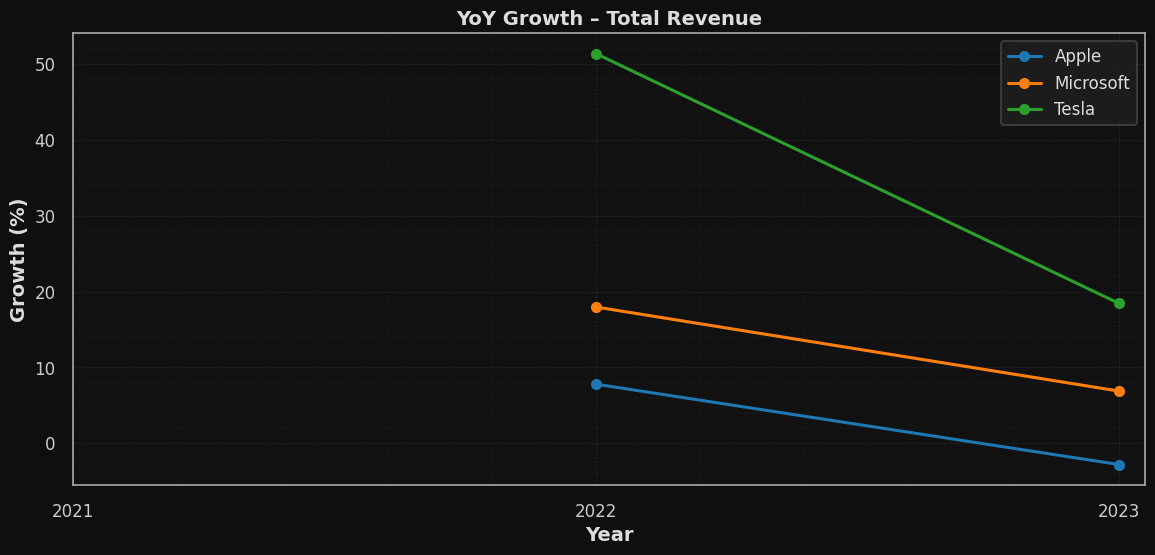

📈 Plot saved: plots\net_income_growth_trend.png


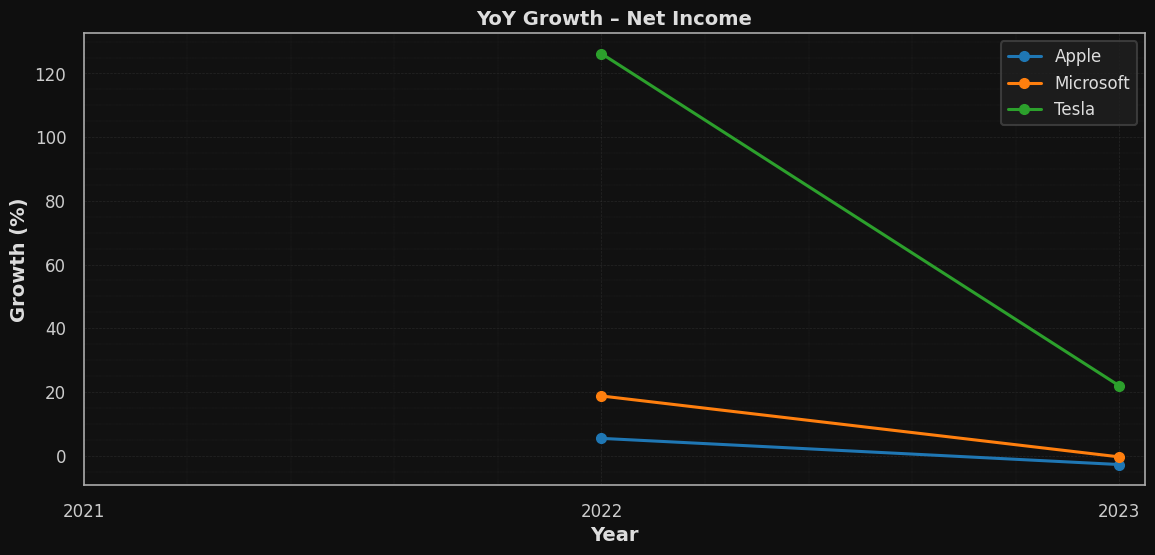

📈 Plot saved: plots\cash_flow_from_operating_activities_growth_trend.png


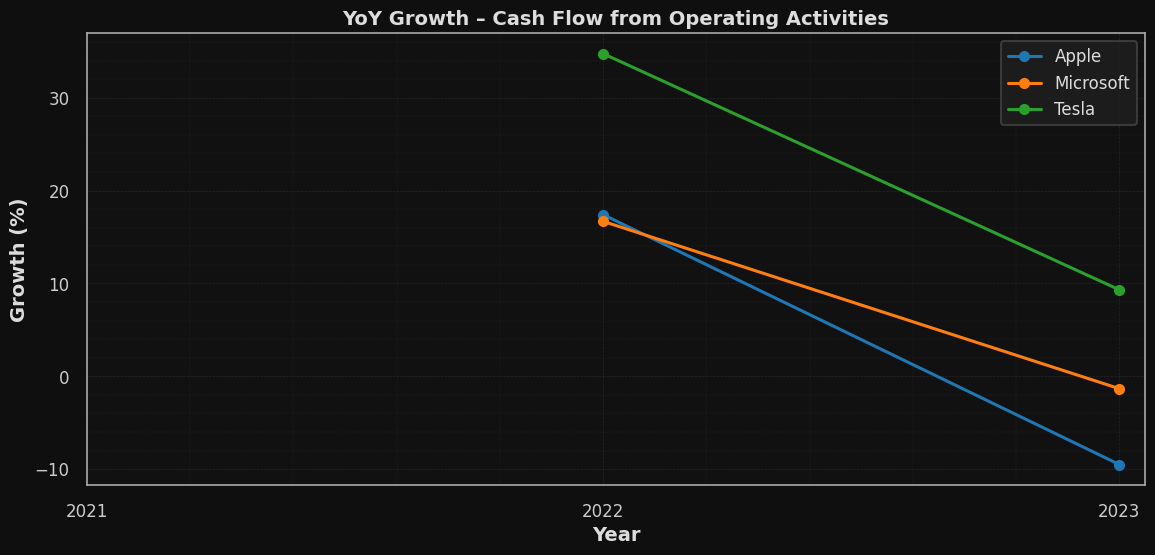

📄 Final dataset saved with growth rates.


In [6]:

filepath = "datasets/final_financial_data.csv"

df = load_data(filepath)

key_metrics = [
    "Total Revenue", "Net Income", "Total Assets",
    "Total Liabilities", "Cash Flow from Operating Activities"
]

df = compute_growth(df, key_metrics)

for metric in ["Total Revenue", "Net Income", "Cash Flow from Operating Activities"]:
    plot_growth_trend(df, metric)

# Save final output
df.to_csv("financials_with_growth.csv", index=False)
print("📄 Final dataset saved with growth rates.")


# Final Executive Summary (2021–2023 Analysis): Apple, Microsoft, and Tesla

---

## Revenue Trends
- **Apple** consistently generated the **highest revenue**, peaking at **$394B in 2022**, followed by a slight decline to **$383B in 2023**. This minor contraction may reflect **market saturation** or **macroeconomic headwinds**.
- **Microsoft** displayed **steady and reliable growth**, increasing revenue from **$168B (2021)** to **$212B (2023)**. This upward trend is largely driven by **cloud services, software expansion**, and **strong enterprise demand**.
- **Tesla** experienced **explosive revenue growth**, nearly **doubling** from **$54B (2021)** to **$96B (2023)**, showcasing aggressive **market penetration in the EV industry** and **scaling efficiency**.

---

## Net Income Trends
- **Apple** maintained **exceptional profitability**, with net income hovering close to **$100B annually**. The slight dip in 2023 aligns with its revenue contraction but does not affect overall financial strength.
- **Microsoft** demonstrated consistent net income growth from **$61B to $72B**, though the growth rate has slightly moderated, possibly due to **higher R&D and infrastructure investments**.
- **Tesla** recorded a **remarkable surge in net income**, tripling from **$5.5B (2021)** to **$15B (2023)**, signaling improved **margins and production efficiency**.

---

## Operating Cash Flow
- **Apple** and **Microsoft** both sustained **strong operational cash flows**, a sign of **financial maturity** and **efficient capital allocation**.
- **Tesla** increased operating cash flow from **$11B to $16B**, confirming its **evolving financial resilience** and **cash-efficient growth model**.

---

## Final Conclusion (for AI-Powered Chatbot Insights)

| Company    | Summary Insight |
|------------|------------------|
| **Apple**     | Most **stable and profitable** performer with **minimal volatility** and **strong fundamentals**. Ideal for users seeking consistent benchmarks. |
| **Microsoft** | Shows **balanced, enterprise-driven growth**, suitable for **SaaS or B2B-focused financial narratives**. Reliable in long-term projection models. |
| **Tesla**     | Represents **high-growth, high-innovation** trajectory. Best for illustrating **startup-to-scale-up transitions** and **future-forward investment trends**. |

---

## Application in AI Chatbot Design

This financial analysis provides a solid base for training an AI-powered financial chatbot to:

- Explain **financial trends** using plain language and data-backed summaries  
- Detect and highlight **company-specific risks and strengths**  
- Deliver **actionable insights** to analysts, investors, and decision-makers in real time  
- Adapt responses for users with different financial literacy levels  

---

> Use this structured insight to build **domain-aware AI agents** capable of contextual financial interpretation and engagement.
